In [38]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [39]:
data = [22, 22, 22, 22, 22, 80, 80, 80, 80, 80, 80, 80, 21, 21, 25, 25, 25, 53]

In [40]:
freq = Counter(data)
mostfreq = freq.most_common()
mostfreq

[(80, 7), (22, 5), (25, 3), (21, 2), (53, 1)]

In [41]:
porcentagem = []
for i in mostfreq:
    porcentagem.append((i[1]/len(data))*100)

In [42]:
porc_pareto = np.cumsum(porcentagem)

In [43]:
x_pareto = []
y_pareto = []
for i in mostfreq:
    x_pareto.append(i[0])
    y_pareto.append(i[1])

In [44]:
df2 = pd.DataFrame({'valores':x_pareto, 'porcentagens':porc_pareto})

In [45]:
df = pd.DataFrame(mostfreq, columns = ['valores', 'freq'])

Text(0.5, 1.0, 'Pareto de PortNumber')

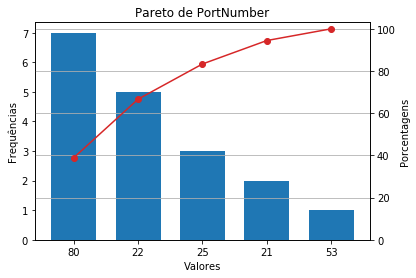

In [48]:
ax = df.groupby(['valores']).median().sort_values("freq",ascending=False).plot(kind='bar',legend=False,width=0.7)
plt.xlabel('Valores')
plt.ylabel('Frequências')
ax2 = df2.porcentagens.plot(secondary_y='porcentagens', kind='line', ax = ax, color='C3', marker='o')
plt.ylim(bottom=0)
ax2.yaxis.grid()
plt.ylabel('Porcentagens')
plt.title('Pareto de PortNumber')

In [50]:
fig = ax.get_figure()
fig.savefig('plot2.png', dpi=200)

In [181]:
atrib_freq = [mostfreq[0][0]]
for i in mostfreq[1:]: # ignora o primeiro
    if i[1] >= 0.7*mostfreq[0][1]: # se a frequência for maior ou igual a 70% do maior, é outro pico
        atrib_freq.append(i[0])

In [196]:
atrib_freq.sort()
atrib_freq

[3, 4]

In [197]:
print('Teste: ' + ', '.join(str(valor) for valor in atrib_freq))

Teste: 3, 4
